**Instructions.** In this practical, you will walk through some examples on data transformation, exploration and imputation. You will need to solve some problems following the examples. Place your answers in the cell below the problems, and you may add new cells if needed. Make sure your code is included in your answers.

You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems.

# Part 1 Data Transformation

In computer programming, a *data type* of a variable determines what type of values it can contain and what operations can be performed. The following table summarises some of the common data types we will come across in R:

| Data Type | Example                     | R Code                      |
|-----------|-----------------------------|-----------------------------|
| Logical   | TRUE, FALSE                 | `v <- TRUE`                 |
| Numeric   | 12.3, 5, 999                | `v <- 23.5`                 |
| Integer   | 1L, 34L, 0L                 | `v <- 2L`                   |
| Character | "a", "good", "TRUE", '23.4' | `v <- "TRUE"`               |

You can use the `class(var)` syntax to determine what object type a variable is, as demonstrated in the following example:

In [68]:
char_var <- "12345" 
num_var <- 12345 
class(char_var)
class(num_var)

[1] "character"

[1] "numeric"

Having a dataset that contains inconsistent *data types* is a common data cleaning problem. The above example demonstrates two different ways the number 12345 could be expressed in a dataset, as a `character` or a `numeric` value. The data type of the variable determines what sort of operations can be performed on them.

Datasets that are interpreted as the wrong data type, or that are *inconsistent* need to be cleaned so that the desired operations can be performed on the dataset. If a column that is supposed to contain integers contains characters, for example, we can no longer run numeric functions such as `mean()` on those values:

In [69]:
a <- c(15, 20, 1, 10)
b <- c("15", "1", "4")

# Valid! We can compute the mean of numberic values.
print(mean(a))
# You can't compute the mean from a set of characters by a number.
print(mean(b))

[1] 11.5


Warning message in mean.default(b):
“argument is not numeric or logical: returning NA”

[1] NA


Luckily, R contains built-in functions designed to convert between data-types. If we use the `as.numeric()` function, we can attempt to convert a `character` to a `numeric type`. Let's try the above example again, making sure we convert the characters to a numeric value before attempting to run the `mean` function:

In [70]:
b <- c("15", "1", "4")
mean(as.numeric(b))

[1] 6.666667

Converting between data-types is a common feature of *data-cleaning* and *transformation*. Let's demonstrate by cleaning an example dataset.

This dataset is a modified version of food-borne gastrointestinal illness in the US in 1940. The data has been modified from the original to include Brisbane-based addresses and some more obvious data integrity issues have been injected.

In [71]:
library(readr)
oswego <- read_csv("OswegoTutorial.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  sex = col_integer(),
  timesupper = col_integer(),
  onsettime = col_integer()
)
See spec(...) for full column specifications.


Our first step might be to explore the data and get a feel for the type of data we are working with. We can use the `head()` function to have a look at the first few rows of the data:

In [72]:
head(oswego)

age,sex,timesupper,ill,address,onsetdate,onsettime,bakedham,spinach,mashedpota,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,"7104 Legend Avenue, Waterfront Place, QLD, 4001",NA,NA,no,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,"7402 Woodhall Lane, Eagle Farm, QLD, 4009",19-Apr,30,yes,yes,yes,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,"7206 Nikerton Street, Wintergarden, QLD, 4002",19-Apr,30,yes,yes,yes,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,"579 Woodleaf Drive, Albion, QLD, 4010",19-Apr,30,yes,yes,no,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,"3611 Nottingham Oaks Avenue, Spring Hill, QLD, 4000",NA,NA,no,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,"5450 Cd Smith Way, New Farm, QLD, 4005",18-Apr,2230,yes,yes,no,⋯,yes,no,no,no,no,yes,no,yes,no,no


If we want to determine how large the dataset is, we can use the `dim()` function to determine the dimensions:

In [73]:
dim(oswego)

[1] 76 21

Let's have a closer look at the "age" column:

In [74]:
oswego$age

[1] "11"    "52"    "65"    "59"    "13"    "63"    "70"    "40"    "15"   
[10] "33"    "65"    "38"    "62"    "10"    "25"    "32"    "62"    "36"   
[19] "11"    "33"    "13"    "seven" "64"    "3"     "65"    "59"    "15"   
[28] "622"   "37"    "17"    "35"    "15"    "50"    "40"    "35"    "35"   
[37] "36"    "57"    "16"    "68"    "54"    "77"    "72"    "58"    "20"   
[46] "17"    "62"    "20"    "52"    "9"     "50"    "8"     "35"    "48"   
[55] "25"    "11"    "74"    "12"    "44"    "53"    "37"    "24"    "69"   
[64] "7"     "17"    "8"     "11"    "17"    "36"    "21"    "60"    "18"   
[73] "14"    "52"    "45"    NA

Do you notice anything odd about this row? It looks like there was a data input error, and the number 7 has been inserted as the word "seven". Let's see how this affects our data analysis by trying to run the mean() function on the age column to determine the average age of people in our dataset.

In [75]:
mean(oswego$age)

Warning message in mean.default(oswego$age):
“argument is not numeric or logical: returning NA”

[1] NA

As you can see, we get an error, saying that the "argument is not numeric or logical". It looks like we can only run the mean function on a column that is *numeric* or *logical*. What data type is the age column?

In [76]:
class(oswego$age)

[1] "character"

We can see that R has interpreted this column as the 'character' data type, which explains why we can't run the mean function on it. Let's first replace the character(s) "seven" with "7" so that we can easily convert the whole column to a numeric data type.

In [77]:
oswego$age[oswego$age == "seven"] <- "7"

Let's break down the above query a little bit. The `oswego$age == "seven"` is what is called a *conditional statement*, it matches values in `oswego$age` according to a specific condition. In this case, we match any of the rows that have the value "seven". We then set any of these rows to the character "7" instead.

|<center>TASK</center>|
| ---- |
| Convert the age column to the correct data-type (numeric). What is the mean of the ages? |

In [78]:
# [Place your Answer here]
mean(as.numeric(oswego$age), na.rm=T)

#the mean of the ages is 44.28


[1] 44.28

You may have noticed that in our `oswego` dataset, we have the full address of each patient. Can you think of how this may be useful?

One use of this locational data might be to see if outbreaks are clustered around particular suburbs/areas. In this case, being able to query the postcode directly would be useful, but currently the postcode is within the 'Address' column, which has the format:

```
38 Jones Road, South Brisbane, QLD 4101
```

One common aspect of preparing your data for use is making sure that it is in a format that is as simple to query as possible. For example, in the above case, if we wanted to find out what the most common suburb is which contained an outbreak, we would not be able to easily query suburb specifically with the `address` column as it contains a lot of superflous information.

One solution might be to transform the data so each part of the address is in its own column - that way we query against a much simpler attribute such as postcode.

Let's demonstrate this by splitting up the "onsetdate" column first as an example. You can see that the `onsetdate` is in the format:

```
19-Apr
```
If we wanted to query directly by month, we could separate the "Month" part of the address directly into its own column. Let's do that. We will use the "tidyr" library in R, a popular data transformation library. Run the code below and try and understand what it is doing.

In [79]:
library(tidyr)

oswego_new <- separate(oswego, onsetdate, into = c("onset_day", "onset_month"), sep = "-")
head(oswego_new)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [24].”

age,sex,timesupper,ill,address,onset_day,onset_month,onsettime,bakedham,spinach,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,"7104 Legend Avenue, Waterfront Place, QLD, 4001",NA,NA,NA,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,"7402 Woodhall Lane, Eagle Farm, QLD, 4009",19,Apr,30,yes,yes,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,"7206 Nikerton Street, Wintergarden, QLD, 4002",19,Apr,30,yes,yes,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,"579 Woodleaf Drive, Albion, QLD, 4010",19,Apr,30,yes,yes,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,"3611 Nottingham Oaks Avenue, Spring Hill, QLD, 4000",NA,NA,NA,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,"5450 Cd Smith Way, New Farm, QLD, 4005",18,Apr,2230,yes,yes,⋯,yes,no,no,no,no,yes,no,yes,no,no


|<center>TASK</center>|
| ---- |
| There is a warning message for 1 row in the above conversion. Indeed, there is an issue with the data if you examine the content of that row. Write your R code to fix the issue and regenerate the `oswego_new` dataframe.|

In [80]:
# [Place your Answer here]
oswego[24,'onsetdate']='18-Apr'
library(tidyr)
oswego_new <- separate(oswego, onsetdate, into = c("onset_day", "onset_month"), sep = "-")
head(oswego_new)

age,sex,timesupper,ill,address,onset_day,onset_month,onsettime,bakedham,spinach,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,"7104 Legend Avenue, Waterfront Place, QLD, 4001",NA,NA,NA,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,"7402 Woodhall Lane, Eagle Farm, QLD, 4009",19,Apr,30,yes,yes,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,"7206 Nikerton Street, Wintergarden, QLD, 4002",19,Apr,30,yes,yes,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,"579 Woodleaf Drive, Albion, QLD, 4010",19,Apr,30,yes,yes,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,"3611 Nottingham Oaks Avenue, Spring Hill, QLD, 4000",NA,NA,NA,no,no,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,"5450 Cd Smith Way, New Farm, QLD, 4005",18,Apr,2230,yes,yes,⋯,yes,no,no,no,no,yes,no,yes,no,no


Now that we've separated the columns, we can directly query "month" to see the range of months that these outbreaks occurred.

In [81]:
unique(oswego_new$onset_month)

[1] NA    "Apr" "Jun"

We can see that this data is limited to April, June and also that a lot of the onset date data is missing, resulting in 'NA' values. Now let's see how we can get useful information from the location information.

|<center>TASK</center>|
| ---- |
| Separate the "address" column into four new columns, `address`, `suburb_name`, `state` and `postcode` |

In [82]:
# [Place your Answer here]
oswego_new <- separate(oswego_new, address, into = c('address',"suburb_name", "state", "postcode"), sep = ",", remove = TRUE)
oswego_new

age,sex,timesupper,ill,address,suburb_name,state,postcode,onset_day,onset_month,⋯,jello,rolls,brownbread,milk,coffee,water,cakes,vanilla,chocolate,fruitsalad
11,2,NA,no,7104 Legend Avenue,Waterfront Place,QLD,4001,NA,NA,⋯,no,no,no,no,no,no,no,no,yes,no
52,1,2000,yes,7402 Woodhall Lane,Eagle Farm,QLD,4009,19,Apr,⋯,no,yes,no,no,yes,no,no,yes,no,no
65,2,1830,yes,7206 Nikerton Street,Wintergarden,QLD,4002,19,Apr,⋯,no,no,no,no,yes,no,no,yes,yes,no
59,1,1830,yes,579 Woodleaf Drive,Albion,QLD,4010,19,Apr,⋯,no,no,no,no,yes,no,yes,yes,yes,no
13,1,NA,no,3611 Nottingham Oaks Avenue,Spring Hill,QLD,4000,NA,NA,⋯,no,no,no,no,no,no,no,no,yes,no
63,1,1930,yes,5450 Cd Smith Way,New Farm,QLD,4005,18,Apr,⋯,yes,no,no,no,no,yes,no,yes,no,no
70,2,1930,yes,2277 Old Bridge Parkway,Rothwell,QLD,4022,18,Apr,⋯,yes,yes,yes,no,yes,yes,no,yes,no,no
40,1,1930,yes,9170 Wethersfield Way,Rothwell,QLD,4022,19,Apr,⋯,no,no,no,no,no,no,no,yes,yes,no
15,1,2200,yes,9913 Shadowmoss Parkway,Waterfront Place,QLD,4001,19,Apr,⋯,no,no,no,no,no,no,yes,no,yes,no
33,1,1900,yes,1521 Gayle Lane,Cowan Cowan,QLD,4025,18,Jun,⋯,no,yes,yes,no,no,yes,no,yes,yes,no


|<center>TASK</center>|
| ---- |
| Which postcode has the most occurrences of illness? Remember, you will need to filter your data by only those who are ill. |


In [83]:
# [Place your Answer here]
ill_postcode=as.data.frame(table(oswego_new[oswego_new[,'ill']=='yes',]$postcode)) 
ill_postcode[ill_postcode[,c(2)]==max(ill_postcode[,2]),]
#4010 and 4006 postcode has the most occurrences of illness （5）

,Var1,Freq
6,4006,5
9,4010,5


|<center>Extension TASK</center>|
| ---- |
| List all postcodes and number of occurences using (1) R and (2) MySQL (tip: use group by query). This question will not be graded.|

In [84]:
# [Place your Answer here]

#(1) 
as.data.frame(table(oswego_new$postcode)) 

#(2) SELECT postcode, COUNT(*) FROM OswegoTutorial GROUP BY postcode


Var1,Freq
4000,4
4001,7
4002,2
4004,3
4005,2
4006,6
4007,3
4008,2
4009,2
4010,6


|<center>TASK</center>|
| ---- |
| Calculate the mean age for each postcode, with `na` excluded. Is there any anomaly in the result? If yes, what is the cause?|

In [85]:
# [Place your Answer here]
oswego_new$age=as.numeric(oswego_new$age, na.rm=T)
aggregate(oswego_new$age, by = list(oswego_new$postcode), mean, na.rm=T)

#Yes, it is caused by data input error.
#In the postcode of 4021 QLD, the age being entered is 622 which is not correct.


Group.1,x
4000,35.75000
4001,27.14286
4002,57.50000
4004,38.00000
4005,50.50000
4006,41.83333
4007,26.33333
4008,23.50000
4009,33.50000
4010,51.00000


# Part 2 Data Exploration

In Prac. 1, we first encountered the HR Analytics dataset.

The question we seek to answer is: *Why are our best and most experienced employees leaving?*

To get to grips with the data, we will carry out some exploratory data analysis (EDA) techniques in R.

Firstly, let's import the data and look at a few rows.

In [86]:
library(readr)
HR_comma_sep <- read_csv("https://stluc.manta.uqcloud.net/mdatascience/public/datasets/HumanResourceAnalytics/HR_comma_sep.csv")
HR_comma_sep

Parsed with column specification:
cols(
  satisfaction_level = col_double(),
  last_evaluation = col_double(),
  number_project = col_integer(),
  average_montly_hours = col_integer(),
  time_spend_company = col_integer(),
  Work_accident = col_integer(),
  left = col_integer(),
  promotion_last_5years = col_integer(),
  sales = col_character(),
  salary = col_character()
)


satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low
0.10,0.77,6,247,4,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.42,0.53,2,142,3,0,1,0,sales,low


|<center>TASK</center>|
| ---- |
| What type of variable is `left`? Here "type" refers to the variable types mentioned in lecture. |

In [87]:
# [Place your Answer here]

#The type of left is quantitative.


Now, let's count the number of rows with missing data.

In [88]:
sum(!complete.cases(HR_comma_sep))

[1] 0

Since there is no missing data, we can proceed with our analysis on the complete data set.

Let's explore some simple quantitative summaries.  The default summary statistics are as follows.

In [89]:
summary(HR_comma_sep)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000      
 Max.   :10.000     Max.  

These statistics tell us a bit about each variable in isolation; what we would like to do is obtain statistics pertinent to our question.

To proceed, it is useful to classify each variable as either a *response* or a *predictor*.  For this problem and data set, it is clear that `left` is the response and all other variables are predictors.

For example: What is the breakdown of `left` by job Department (`sales`)?

This is easily achieved by creating a *two-way contingency* table, which counts the number of intances in each `left` by `sales` cell in a two by two table.

In [90]:
test_table<-table(HR_comma_sep$sales,HR_comma_sep$left)
test_table

             
                 0    1
  accounting   563  204
  hr           524  215
  IT           954  273
  management   539   91
  marketing    655  203
  product_mng  704  198
  RandD        666  121
  sales       3126 1014
  support     1674  555
  technical   2023  697

Marginal counts and proportions are easily created as follows.

In [91]:
margin.table(test_table) 
margin.table(test_table,1)
margin.table(test_table,2)

prop.table(test_table)
prop.table(test_table,1)
prop.table(test_table,2)

[1] 14999


 accounting          hr          IT  management   marketing product_mng 
        767         739        1227         630         858         902 
      RandD       sales     support   technical 
        787        4140        2229        2720 


    0     1 
11428  3571 

             
                        0           1
  accounting  0.037535836 0.013600907
  hr          0.034935662 0.014334289
  IT          0.063604240 0.018201213
  management  0.035935729 0.006067071
  marketing   0.043669578 0.013534236
  product_mng 0.046936462 0.013200880
  RandD       0.044402960 0.008067204
  sales       0.208413894 0.067604507
  support     0.111607440 0.037002467
  technical   0.134875658 0.046469765

             
                      0         1
  accounting  0.7340287 0.2659713
  hr          0.7090663 0.2909337
  IT          0.7775061 0.2224939
  management  0.8555556 0.1444444
  marketing   0.7634033 0.2365967
  product_mng 0.7804878 0.2195122
  RandD       0.8462516 0.1537484
  sales       0.7550725 0.2449275
  support     0.7510094 0.2489906
  technical   0.7437500 0.2562500

             
                       0          1
  accounting  0.04926496 0.05712686
  hr          0.04585229 0.06020722
  IT          0.08347917 0.07644917
  management  0.04716486 0.02548306
  marketing   0.05731537 0.05684682
  product_mng 0.06160308 0.05544665
  RandD       0.05827791 0.03388407
  sales       0.27353868 0.28395407
  support     0.14648232 0.15541865
  technical   0.17702135 0.19518342

These proportions can also be conveniently visualised using a mosaic plot, where the widths of rectangles are proportional to the number of observations in the x variable categories (`Department`), and, for each x variable category, the heights are proportional to the number of observations in the corresponding y variable categories (`Left`).

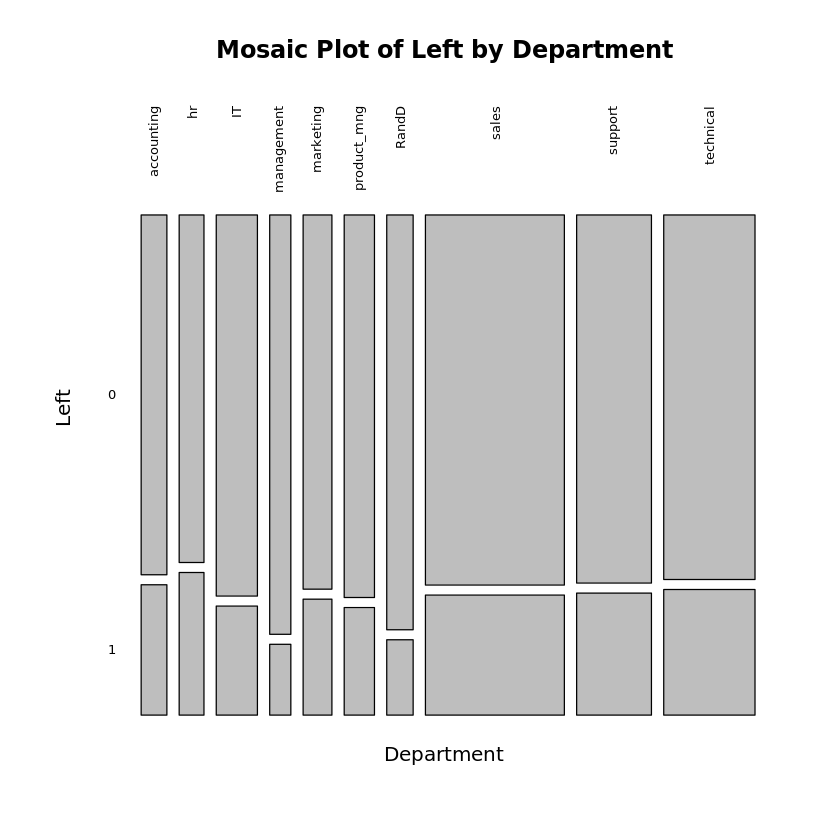

In [92]:
mosaicplot(test_table,main="Mosaic Plot of Left by Department",xlab="Department",ylab="Left",las=2)

|<center>TASK</center>|
| ---- |
| Which Department has the highest proportion of employees that have left, relative to that department?  Which Department has the lowest? |

In [93]:
# [Place your Answer here]

#The HR department has the highest proportion of employees that have left. 
#The management department has the lowest proportion of employees that have left..


How about the breakdown of average hours worked per month by left?

We will first create visual summaries using boxplots (which display summary statistics visually).

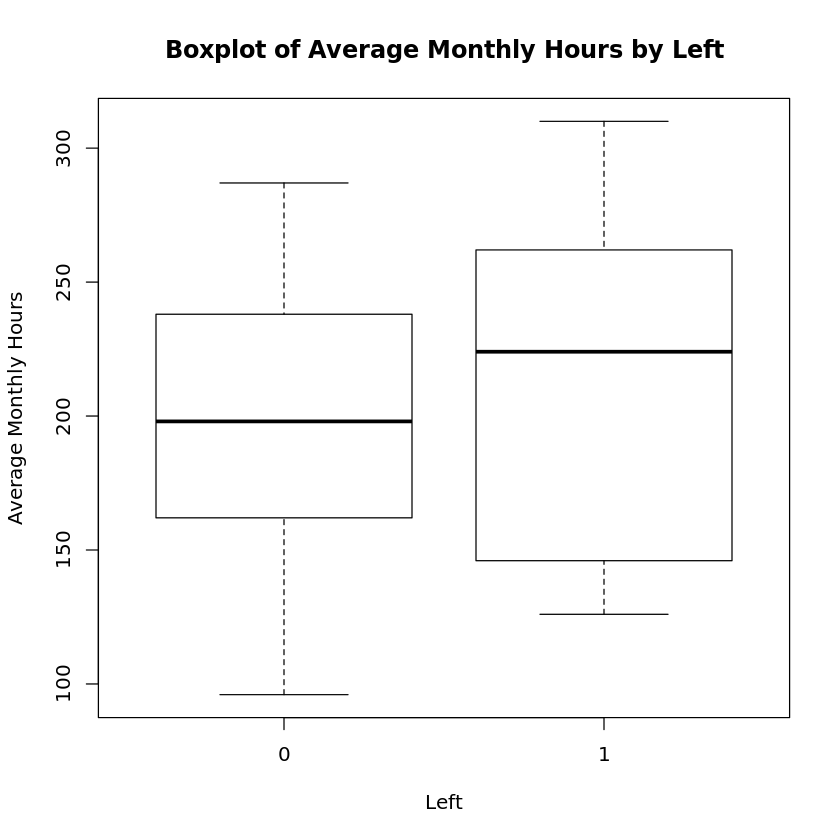

In [94]:
boxplot(HR_comma_sep$average_montly_hours~HR_comma_sep$left,xlab="Left",ylab="Average Monthly Hours",main="Boxplot of Average Monthly Hours by Left")

This simple visual summary suggests that employees that left typically worked longer hours.

We can get a more detailed view by constructing a histogram as follows.

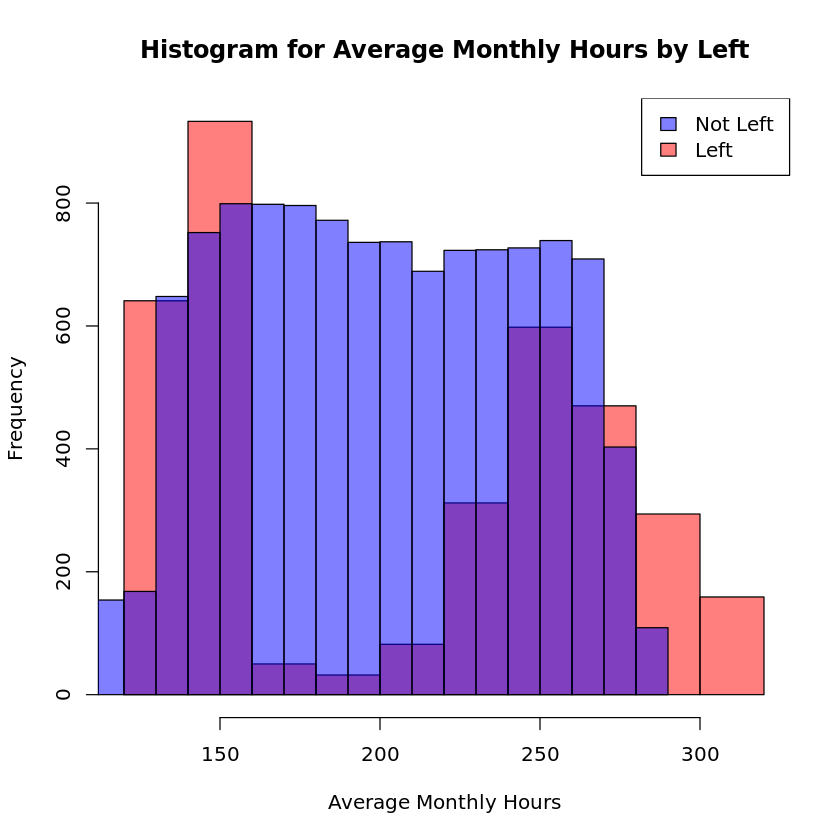

In [95]:
hist(HR_comma_sep$average_montly_hours[HR_comma_sep$left==1], col=rgb(1,0,0,0.5),main="Histogram for Average Monthly Hours by Left", xlab="Average Monthly Hours")
hist(HR_comma_sep$average_montly_hours[HR_comma_sep$left==0], col=rgb(0,0,1,0.5),add=TRUE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

The histogram reveals an interesting feature of the data; the distribution of average monthly hours for employees that left is *multimodal*.  This suggests employees that leave fall into two groups: those that work normal hours and those that work long hours.

The same information can be seen from a plot of the empirical cumulative distribution function (ecdf) for average monthly hours by left.

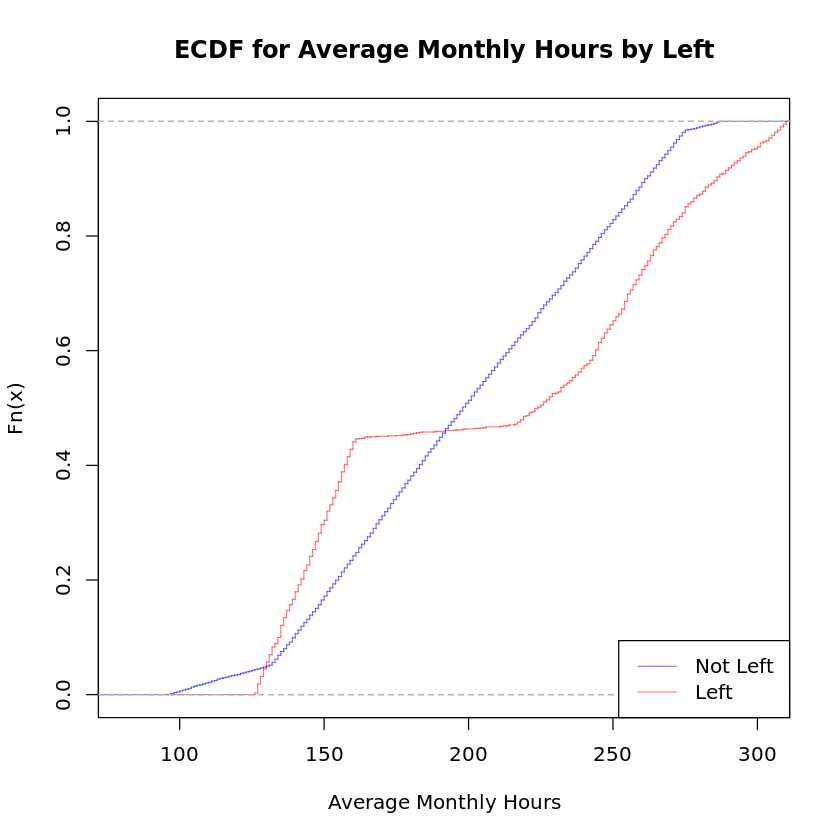

In [96]:
E0<-ecdf(HR_comma_sep$average_montly_hours[HR_comma_sep$left==0])
E1<-ecdf(HR_comma_sep$average_montly_hours[HR_comma_sep$left==1])
plot(E0,col=rgb(0,0,1,0.5),verticals = TRUE, do.points = FALSE,main="ECDF for Average Monthly Hours by Left", xlab="Average Monthly Hours")
plot(E1,col=rgb(1,0,0,0.5),verticals = TRUE, do.points = FALSE,add=TRUE)
legend("bottomright", c("Not Left","Left"),lwd=1, lty=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

We can also look at the time spent in the company by left.

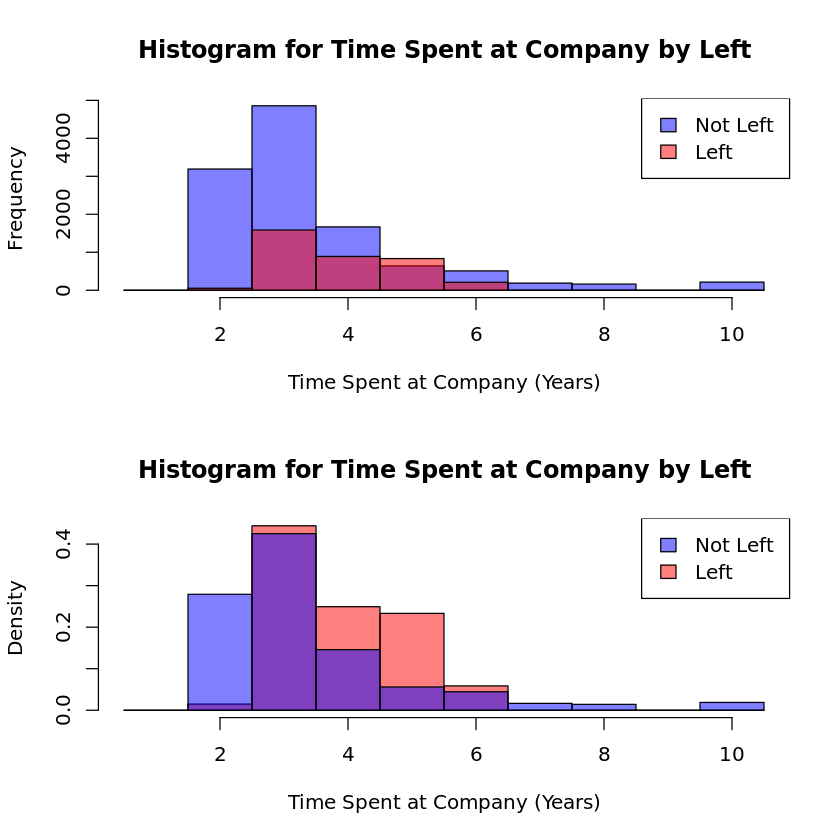

In [97]:
par(mfrow=c(2,1)) # Create 2 by 1 figure
# Plot Frequencies
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==0],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(0,0,1,0.5),main="Histogram for Time Spent at Company by Left", xlab="Time Spent at Company (Years)",freq=TRUE)
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==1],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(1,0,0,0.5),add=TRUE,freq=TRUE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

# Plot Proportions
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==1],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(1,0,0,0.5),main="Histogram for Time Spent at Company by Left", xlab="Time Spent at Company (Years)",freq=FALSE)
hist(HR_comma_sep$time_spend_company[HR_comma_sep$left==0],breaks=c(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5),col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

We see from the above plots that the densities (`Density`) are easier than the frequency counts to visually compare, although relative magnitude information is lost in the process.

The shape of the distributions for time spent at the company are noticably different, with employees that have been at the company for very short of very long periods of time being less likely to leave.  Most employees that leave the company have worked there for between three and five years, inclusive. 

|<center>TASK</center>|
| ---- |
| Construct a histogram for last evaluation by left.  What is a possible explanation for any patterns you see? |

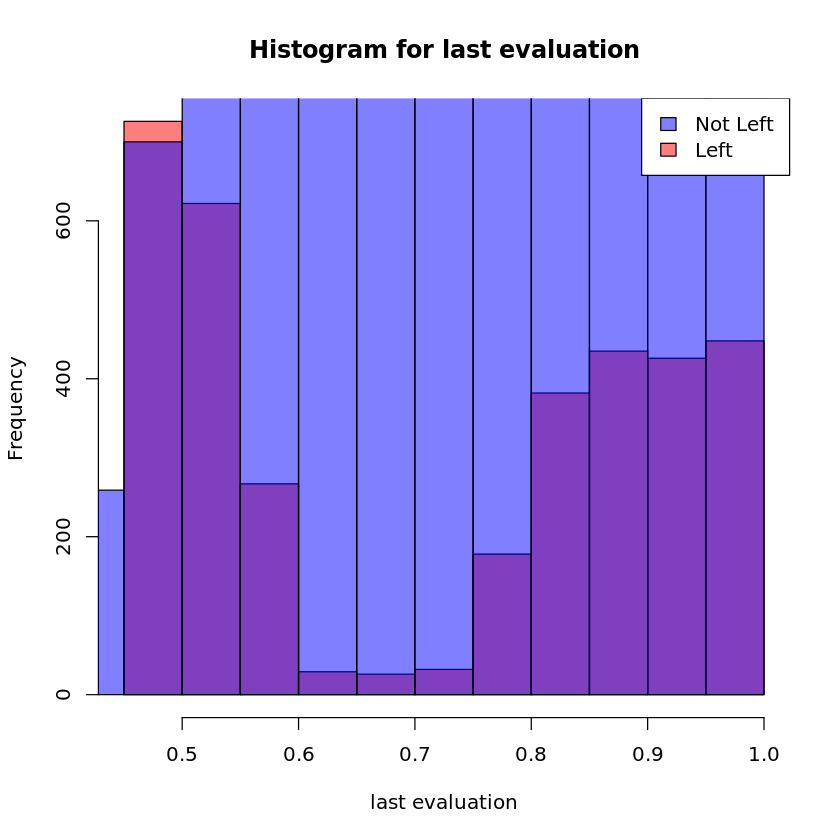

In [100]:
# [Place your Answer here]
hist(HR_comma_sep$last_evaluation[HR_comma_sep$left==1], col=rgb(1,0,0,0.5),main="Histogram for last evaluation", xlab="last evaluation")
hist(HR_comma_sep$last_evaluation[HR_comma_sep$left==0], col=rgb(0,0,1,0.5),add=TRUE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

The histogram reveals the distribution of staff dismission is multimodal. This histogram reveals high rate of staff dismission in the group of low evaluation score and high evaluation score.

|<center>TASK</center>|
| ---- |
| Construct density plots to compare the average monthly working hours, satisfaction level, and last evaluation for those who left management and HR. Are the patterns similar or different for these two departments?|

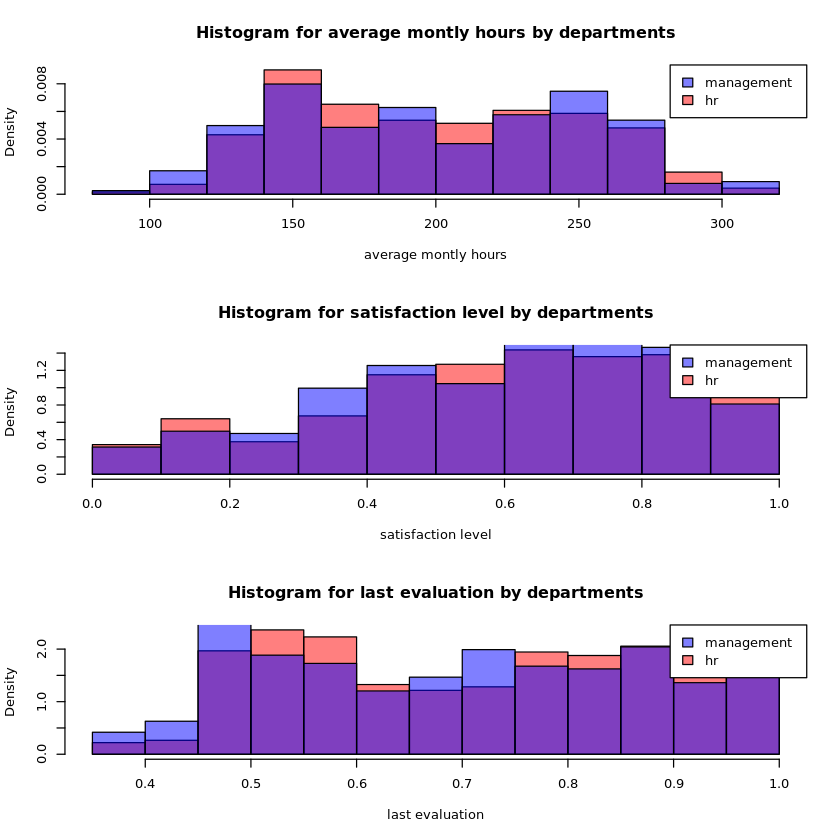

In [102]:
# [Place your Answer here]
par(mfrow=c(3,1))

hist(HR_comma_sep$average_montly_hours[HR_comma_sep[HR_comma_sep$left==1,]$sales=='hr'],col=rgb(1,0,0,0.5),main="Histogram for average montly hours by departments", xlab="average montly hours",freq=FALSE)
hist(HR_comma_sep$average_montly_hours[HR_comma_sep[HR_comma_sep$left==1,]$sales=='management'],col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("management","hr"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

hist(HR_comma_sep$satisfaction_level[HR_comma_sep[HR_comma_sep$left==1,]$sales=='hr'],col=rgb(1,0,0,0.5),main="Histogram for satisfaction level by departments", xlab="satisfaction level",freq=FALSE)
hist(HR_comma_sep$satisfaction_level[HR_comma_sep[HR_comma_sep$left==1,]$sales=='management'],col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("management","hr"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

hist(HR_comma_sep$last_evaluation[HR_comma_sep[HR_comma_sep$left==1,]$sales=='hr'],col=rgb(1,0,0,0.5),main="Histogram for last evaluation by departments", xlab="last evaluation",freq=FALSE)
hist(HR_comma_sep$last_evaluation[HR_comma_sep[HR_comma_sep$left==1,]$sales=='management'],col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("management","hr"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))


These two departments are different

Suppose we wish to plot last evaluation and average monthly hours by leave.  One way to do this is with a scatter plot.

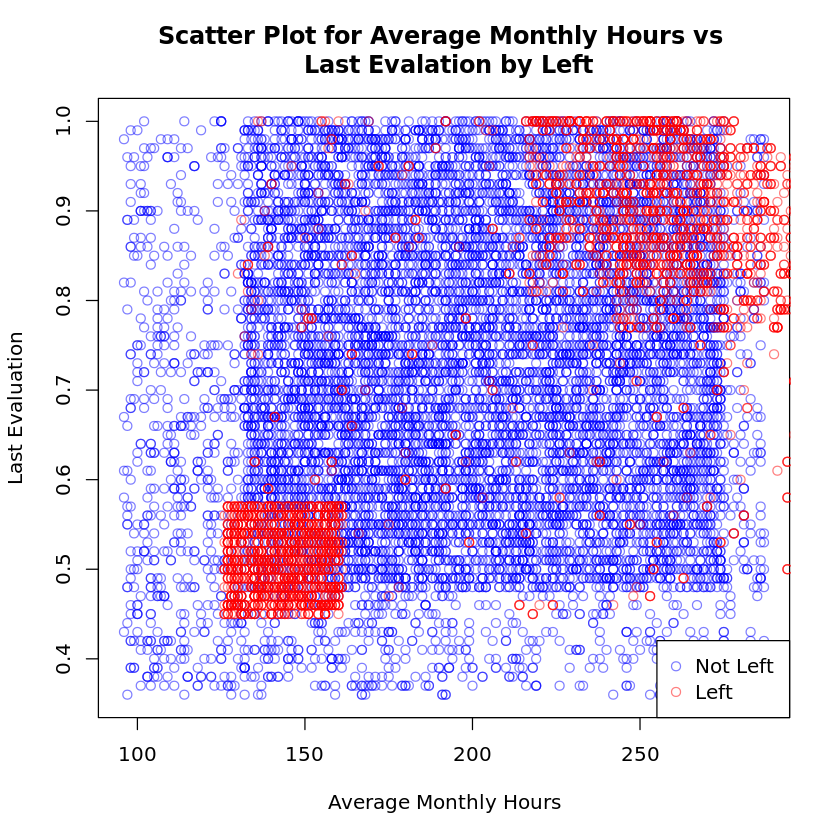

In [103]:
plot(HR_comma_sep$average_montly_hours[HR_comma_sep$left==0],HR_comma_sep$last_evaluation[HR_comma_sep$left==0],main="Scatter Plot for Average Monthly Hours vs \n Last Evalation by Left", xlab="Average Monthly Hours",ylab="Last Evaluation",col=rgb(0,0,1,0.5))
points(HR_comma_sep$average_montly_hours[HR_comma_sep$left==1],HR_comma_sep$last_evaluation[HR_comma_sep$left==1],col=rgb(1,0,0,0.5))
legend("bottomright", c("Not Left","Left"),pch=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

From the scatter plot, we gain additional insight into the relationship between last evaluation, average monthly hours, and those that left.  The bulk of those leaving that worked normal hours also received low evaluations, and most of those leaving that worked long hours received high evaluations.

We can break down the scatterplot further by an additional variable with the construction of a scatter plot matrix.  For instance, we might be curious how satisfaction level, last evaluation, average monthly hours, and left relate to each other.

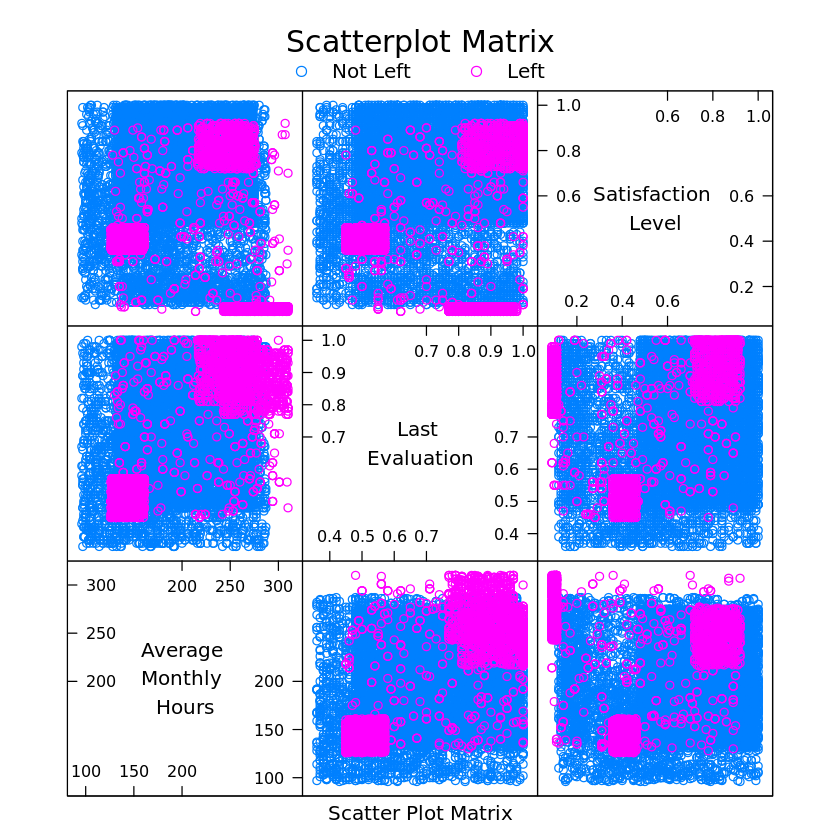

In [104]:
library("lattice") #Load the `Lattice' graphics package
HR_subset<-subset(as.data.frame(HR_comma_sep),select=c('average_montly_hours', 'last_evaluation', 'satisfaction_level', 'left'))
super.sym <- trellis.par.get("superpose.symbol") #Get Symbol Plotting Information
splom(~HR_subset[1:3],groups=left,data = HR_subset,varnames=c("Average \nMonthly \nHours","Last \nEvaluation","Satisfaction \nLevel"),
      key = list(title = "Scatterplot Matrix",
                 columns = 2, 
                 points = list(pch = super.sym$pch[1:2],
                 col = super.sym$col[1:2]),
                 text = list(c("Not Left", "Left"))))

The above code produces a very high quality scatter plot, but has a lot of parameters to set. In practice, we typically want to get a quick and dirty (but working) plot first. This can be achieved using a one-liner `splom(~HR_subset[1:3], groups=left, data=HR_subset)`, or an even simpler one-liner `splom(~HR_subset[1:3], groups=HR_subset$left)`. Try these out. Also try this one-liner: `pairs(HR_subset[,1:3], col=as.factor(HR_subset$left))`.

|<center>TASK</center>|
| ---- |
| We have demonstrated the use of a few tools for visually exploring the relationships between two variables, including mosaic plot, boxplot, histogram, ECDF plot, scatter plots. Write code to apply these tools (if applicable) to visually explore the relationship between of the number of projects and leaving. What is a possible explanation for any patterns you see? |

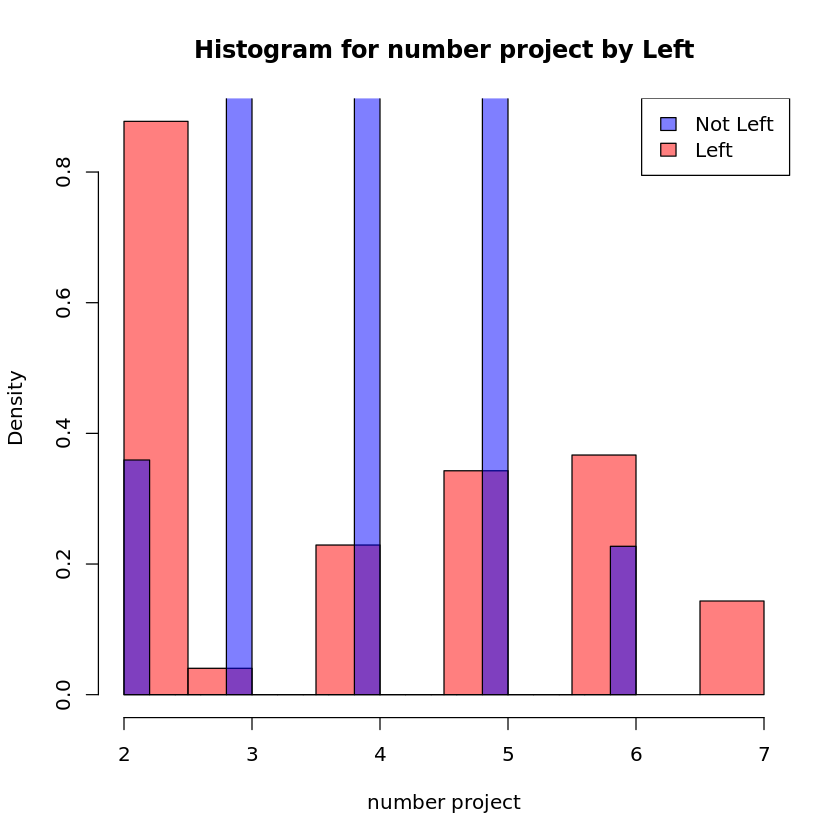

In [125]:
# [Place your Answer here]
hist(HR_comma_sep$number_project[HR_comma_sep$left==1],col=rgb(1,0,0,0.5),main="Histogram for number project by Left", xlab="number project",freq=FALSE)
hist(HR_comma_sep$number_project[HR_comma_sep$left==0],col=rgb(0,0,1,0.5),add=TRUE,freq=FALSE)
legend("topright", c("Not Left","Left"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))
#The number of employees leaving the company is the lowest number project, followed by the Central Tendency.

So far, we have been exploring the entire data set.  Let us return to the original question: *Why are our best and most experienced employees leaving?*

To get to grips with this, we need to identify which subset of employees are "best" and "most experienced".
Precisely what this means to any particular person is ambiguous.  When encountering ambiguity in the problem, the process of resolving that ambiguity involves a two-way dialogue with the *problem poser*.

Broadly, one might imagine this subset to contain:

- Employees with high evaluations.
- Employees the have been with the company for a while.

Additional criteria might be:

- Employees that work on a large number of projects.
- Employees that work a lot.

For now, suppose that the "best" employees are those with an evaluation of 0.8 or higher, and the "most experienced" employees are those that have been with the company for 4 or more years.

|<center>TASK</center>|
| ---- |
| Create a subset of the "best" and "most experienced" employees by appropriately filtering the entire data set.  |

In [106]:
# [Place your Answer here]
best_experienced=HR_comma_sep[HR_comma_sep$time_spend_company>3&HR_comma_sep$last_evaluation>=0.8,]
best_experienced

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.11,0.81,6,305,4,0,1,0,sales,low
0.84,0.92,4,234,5,0,1,0,sales,low
0.78,0.99,4,255,6,0,1,0,sales,low
0.76,0.89,5,262,5,0,1,0,sales,low
0.11,0.83,6,282,4,0,1,0,sales,low


|<center>TASK</center>|
| ---- |
| Perform EDA on the subset of "best" and "most experienced" employees you just created.  What is a possible explanation for any patterns you see? |

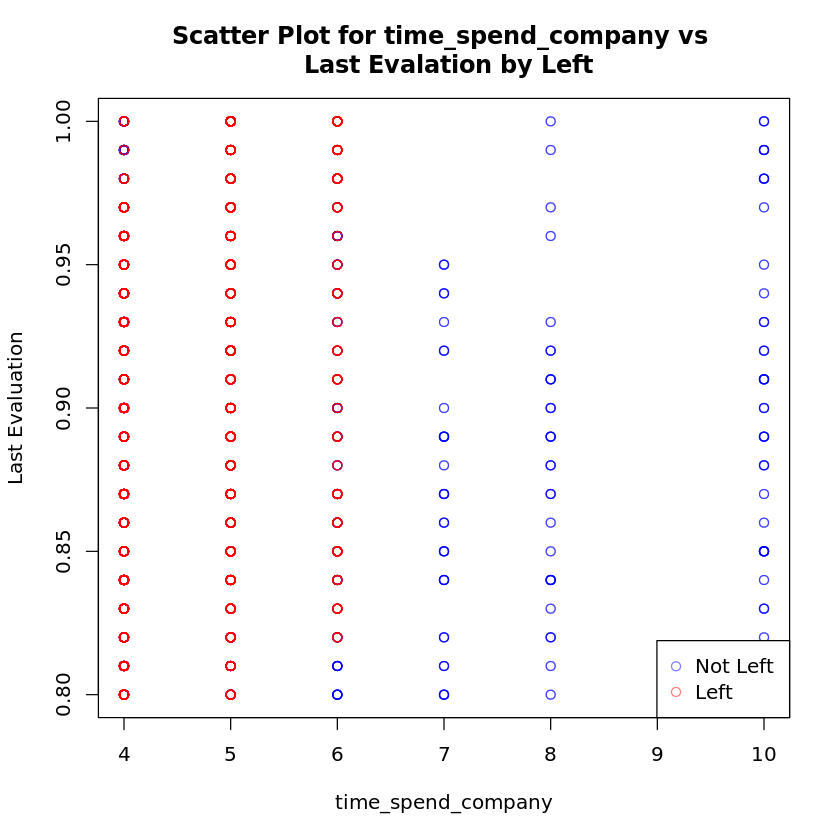

In [107]:
# [Place your Answer here]
plot(best_experienced$time_spend_company[best_experienced$left==0],best_experienced$last_evaluation[best_experienced$left==0],main="Scatter Plot for time_spend_company vs \n Last Evalation by Left", xlab="time_spend_company",ylab="Last Evaluation",col=rgb(0,0,1,0.5))
points(best_experienced$time_spend_company[best_experienced$left==1],best_experienced$last_evaluation[best_experienced$left==1],col=rgb(1,0,0,0.5))
legend("bottomright", c("Not Left","Left"),pch=c(1,1),col=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))


#As the chart shown, most of the best and experienced employees left between the 4th and 6th year.
#From year 7 to 10, litte staff chose to leave the company.



# Exploring Unusual Data

Codifying which observations are "unusual" goes hand-in-hand with the statistical model for data; in particular the assumptions we make about the distribution of the residuals.

A common assumption in statistical analyses is that the residuals follow a *normal distribution*.

Let's simulate 200 normally distributed observations, synthesising heights (in cm) of adult men, plot a histogram, and display standard summary statistics.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  155.4   169.0   173.6   173.8   177.8   194.2 

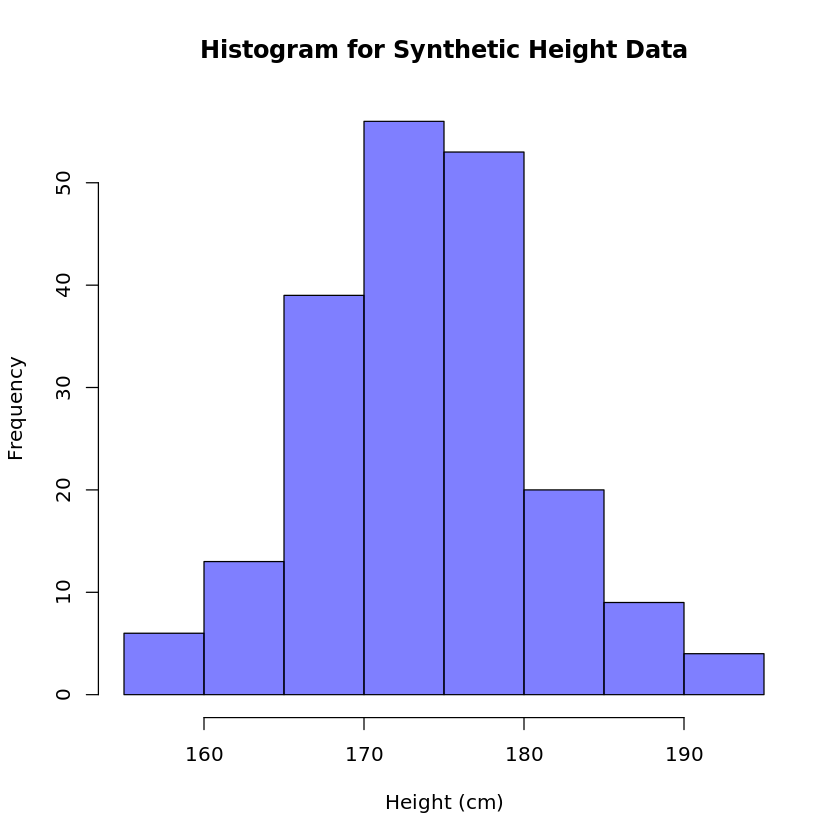

In [108]:
height_data<-rnorm(200, mean = 174.46, sd = 7.15) 
hist(height_data,col=rgb(0,0,1,0.5),main="Histogram for Synthetic Height Data", xlab="Height (cm)")
summary(height_data)

You will notice the symmetric unimodal shape of the histogram.  Re-run the code above several times and observe how the distribution of the data retains these characteristics.

Next, we will create a copy of the data, artificially convert the first 10 observations from units of cm to units of inches, plot another histogram, and display standard summary statistics. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.14  168.01  173.12  168.46  177.48  194.18 

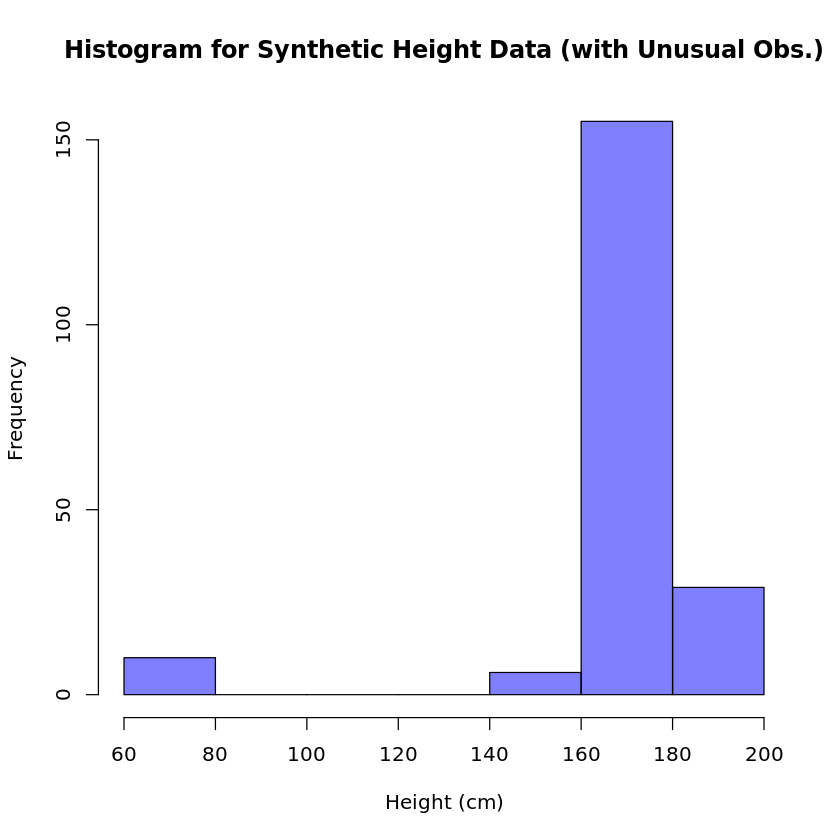

In [109]:
height_data_out<-height_data
height_data_out[1:10]<-height_data_out[1:10]*0.3937007874
hist(height_data_out,col=rgb(0,0,1,0.5),main="Histogram for Synthetic Height Data (with Unusual Obs.)", xlab="Height (cm)")
summary(height_data_out)

For this artifical data, it is immediately clear from the histogram that there are unusual observations, widely separated from the bulk.

Despite both being measures of central tendency, you will notice that the `mean` values have changed noticably, but the `median` values have barely moved.  This is because the `mean` is a sensitive statistic (and consequently is greatly impacted by unusual observations; influential observations in this case).  On the other hand the `median` is a rather insensitive (a *robust statistic*, and is hardly impacted by unusual observations).

Using simple robust measures of central tendency (median) and variability [interquartile range (IQR)], the boxplot visually flags observations that lie outside $\textrm{Median} \pm 1.5 \times \textrm{IQR}$.  These are the observations that may depart from the underlying assumption of normality; the outliers.

Let's create and store a boxplot of the height data with unusual observations.

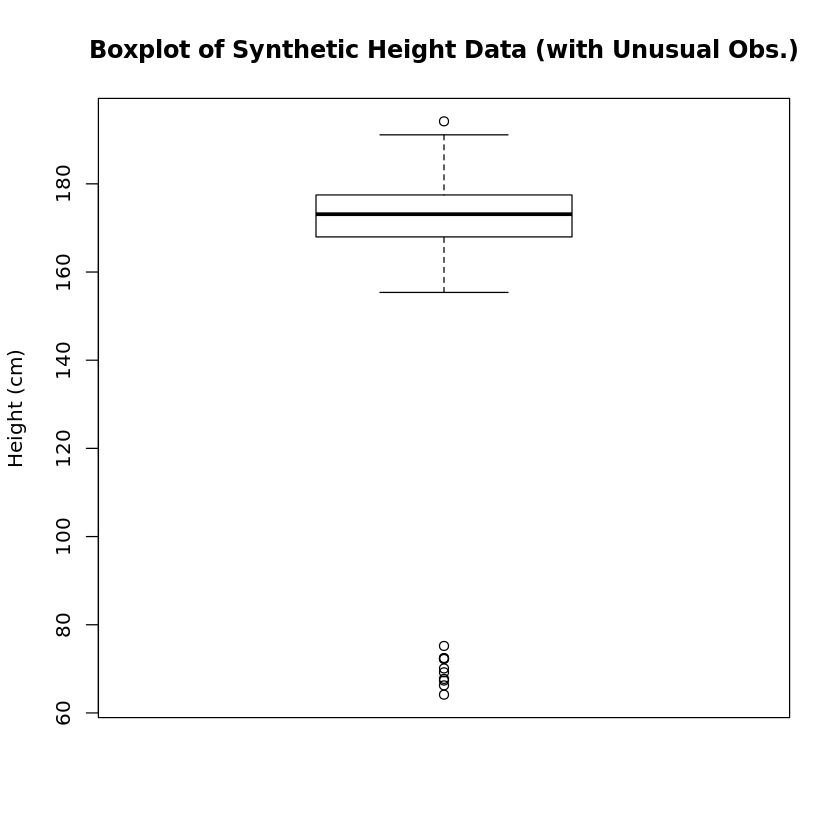

In [110]:
hdo_box<-boxplot(height_data_out,main="Boxplot of Synthetic Height Data (with Unusual Obs.)", ylab="Height (cm)")

All of our artifical unusual observations are clearly labelled as outliers.  

We can extract them from the stored boxplot as follows.

In [111]:
hdo_box$out

[1]  69.20961  67.33930  67.71453  70.08818  72.45141  75.19304  66.25620
 [8]  72.35598  64.14203  72.23063 194.17830

In this instance, after examining the outliers and the context of the data set, it is clear that the reason for these outliers is a simple unit change.

# Part 3 Data Imputation

Let's load up Karl Pearsons' data on the heights (in inches) of fathers and their sons, produce a scatter plot of the data, and display standard summary statistics.

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.80   1st Qu.:66.90  
 Median :67.80   Median :68.60  
 Mean   :67.69   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  

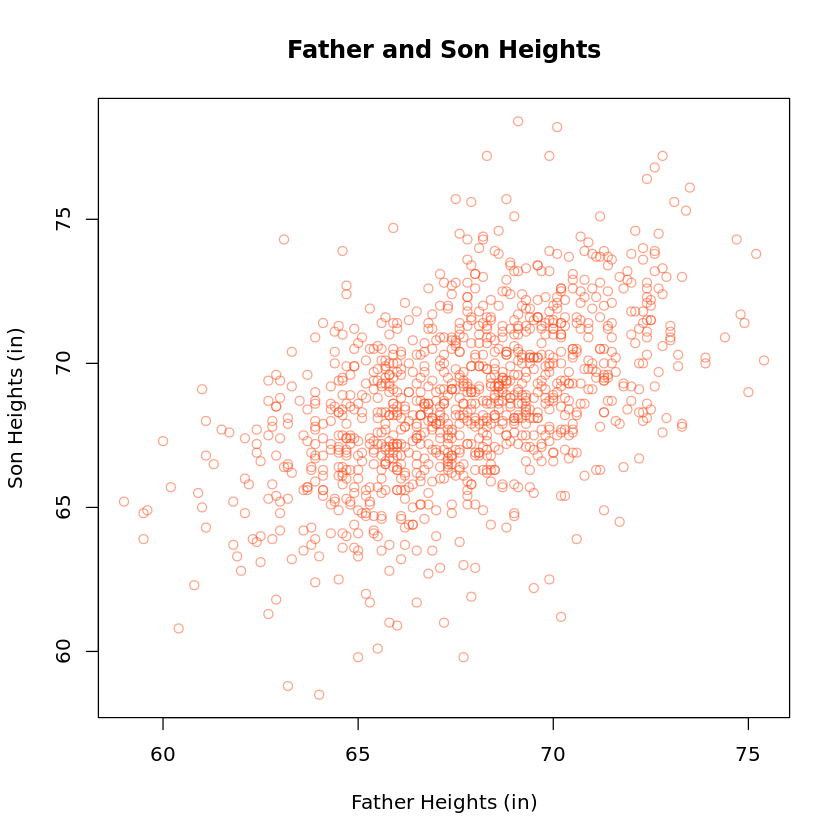

In [112]:
library("readr")
fheight<-read_csv("./PearsonFather.csv",col_names="fheight",col_types="d")
sheight<-read_csv("./PearsonSon.csv",col_names="sheight",col_types="d")
fs_height<-data.frame(fheight,sheight)
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height)

Now, let's create a version of the data set with both father and son heights missing completely at random (MCAR), plot the data, and display summary statistics. 

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.80   1st Qu.:66.90  
 Median :67.80   Median :68.60  
 Mean   :67.72   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  
 NA's   :129     NA's   :102    

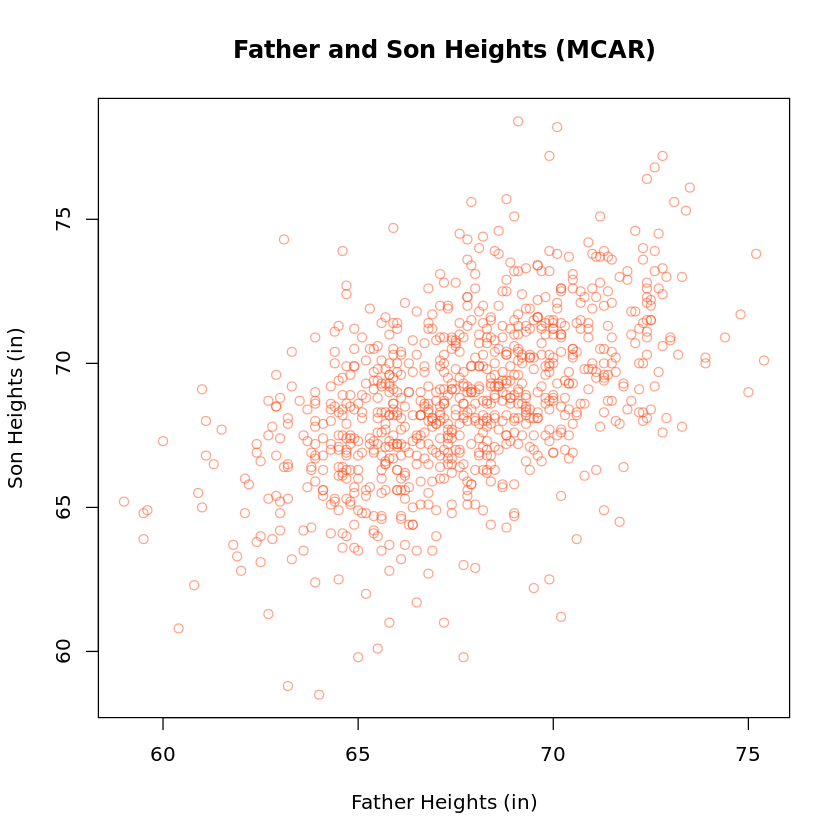

In [113]:
fheight_MCAR<-fheight
fheight_MCAR[rbinom(nrow(fheight),1,0.1)==1,]<-NA
sheight_MCAR<-sheight
sheight_MCAR[rbinom(nrow(sheight),1,0.1)==1,]<-NA
fs_height_MCAR<-data.frame(fheight_MCAR,sheight_MCAR)
plot(fs_height_MCAR$fheight,fs_height_MCAR$sheight,main="Father and Son Heights (MCAR)", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height_MCAR)

Now lets examine the effect of some simple imputation strategies, using the `mice` package.

First up is mean imputation (**not recommended ever in practice**)


 iter imp variable
  1   1  fheight  sheight


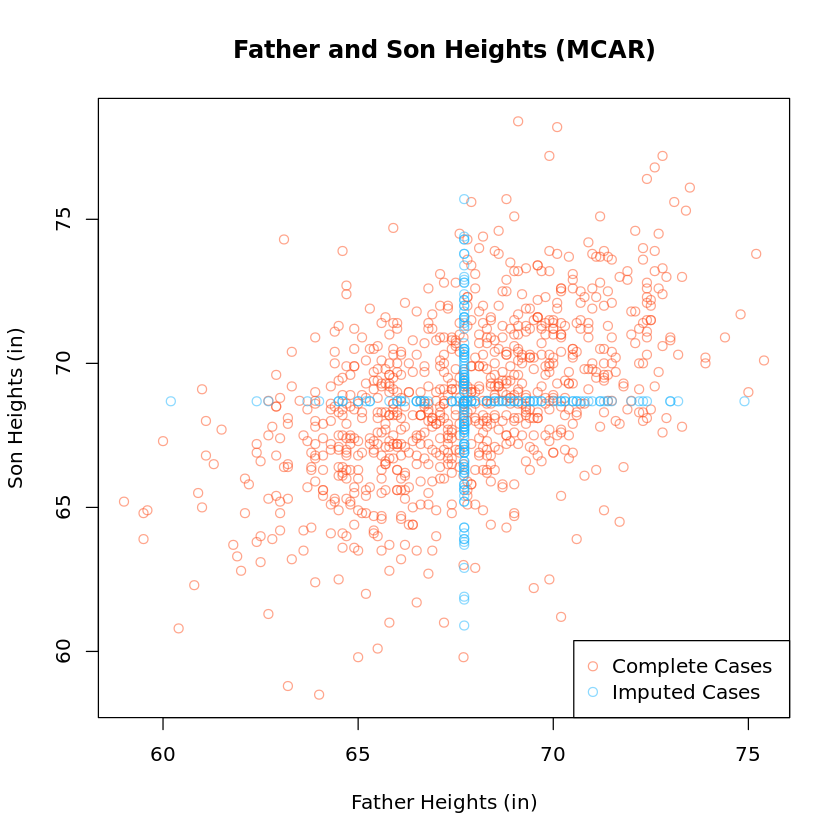

In [114]:
library("mice")
imp_mean<-mice(fs_height_MCAR,method="mean",m=1,maxit=1)
fsh_mean_imp<-complete(imp_mean,1)
fsh_mean_imp$mis<-!complete.cases(fs_height_MCAR)
plot(fsh_mean_imp$fheight[fsh_mean_imp$mis==FALSE],fsh_mean_imp$sheight[fsh_mean_imp$mis==FALSE],main="Father and Son Heights (MCAR)", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
points(fsh_mean_imp$fheight[fsh_mean_imp$mis==TRUE],fsh_mean_imp$sheight[fsh_mean_imp$mis==TRUE],col=rgb(0.1,0.7,1,0.5))
legend("bottomright", c("Complete Cases","Imputed Cases"),pch=c(1,1),col=c(rgb(1,0.3,0.1,0.5), rgb(0.1,0.7,1,0.5)))

The distortion to the data is clearly observable in the plot above.  This distortion is reflected in its effect on the standard deviations of the variables, as can be seen as follows.

In [115]:
as.data.frame(lapply(fs_height,sd)) # Source Data Standard Deviations
as.data.frame(lapply(fs_height_MCAR,sd,na.rm=TRUE)) # Complete-case MCAR Data Standard Deviations
as.data.frame(lapply(fsh_mean_imp[1:2],sd,na.rm=TRUE)) # Mean-imputed MCAR Data Standard Deviations

fheight,sheight
2.745827,2.816194


fheight,sheight
2.765388,2.842546


fheight,sheight
2.594493,2.704593


With a small change in commands, we can perform linear regression imputation (using `method="norm.nob"`).


 iter imp variable
  1   1  fheight  sheight
  2   1  fheight  sheight
  3   1  fheight  sheight
  4   1  fheight  sheight
  5   1  fheight  sheight


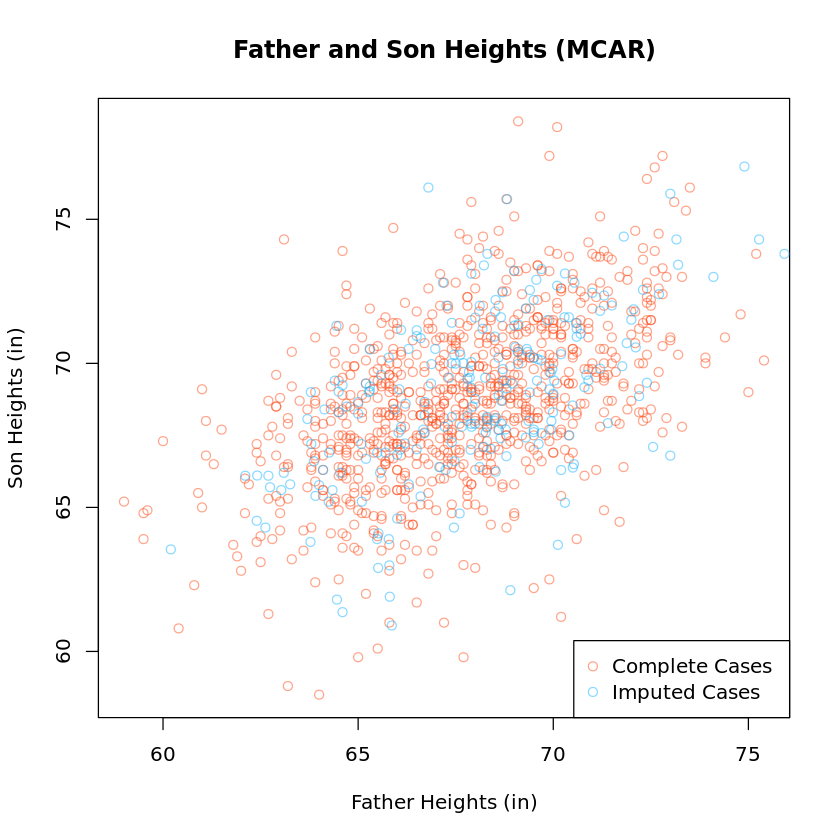

In [116]:
imp_linreg<-mice(fs_height_MCAR,method="norm.nob",m=1)
fsh_linreg_imp<-complete(imp_linreg,1)
fsh_linreg_imp$mis<-!complete.cases(fs_height_MCAR)
plot(fsh_linreg_imp$fheight[fsh_linreg_imp$mis==FALSE],fsh_linreg_imp$sheight[fsh_linreg_imp$mis==FALSE],main="Father and Son Heights (MCAR)", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
points(fsh_linreg_imp$fheight[fsh_linreg_imp$mis==TRUE],fsh_linreg_imp$sheight[fsh_linreg_imp$mis==TRUE],col=rgb(0.1,0.7,1,0.5))
legend("bottomright", c("Complete Cases","Imputed Cases"),pch=c(1,1),col=c(rgb(1,0.3,0.1,0.5), rgb(0.1,0.7,1,0.5)))

Multiple imputation is requested by adjusting the `m=` argument; for example `m=10` will carry out the imputation process 10 times.

As a final exercise, we will fit a linear regression model to (1) the original data; (2) the complete-case data; (3) data multiply-imputated with linear regression;

In [117]:
fit_all<-with(fs_height,lm(sheight~fheight))

fit_MCAR<-with(fs_height_MCAR,lm(sheight~fheight))

mimp_linreg<-mice(fs_height_MCAR,method="norm.nob",m=10)
fit_linreg_mimp<-with(mimp_linreg,lm(sheight~fheight))



 iter imp variable
  1   1  fheight  sheight
  1   2  fheight  sheight
  1   3  fheight  sheight
  1   4  fheight  sheight
  1   5  fheight  sheight
  1   6  fheight  sheight
  1   7  fheight  sheight
  1   8  fheight  sheight
  1   9  fheight  sheight
  1   10  fheight  sheight
  2   1  fheight  sheight
  2   2  fheight  sheight
  2   3  fheight  sheight
  2   4  fheight  sheight
  2   5  fheight  sheight
  2   6  fheight  sheight
  2   7  fheight  sheight
  2   8  fheight  sheight
  2   9  fheight  sheight
  2   10  fheight  sheight
  3   1  fheight  sheight
  3   2  fheight  sheight
  3   3  fheight  sheight
  3   4  fheight  sheight
  3   5  fheight  sheight
  3   6  fheight  sheight
  3   7  fheight  sheight
  3   8  fheight  sheight
  3   9  fheight  sheight
  3   10  fheight  sheight
  4   1  fheight  sheight
  4   2  fheight  sheight
  4   3  fheight  sheight
  4   4  fheight  sheight
  4   5  fheight  sheight
  4   6  fheight  sheight
  4   7  fheight  sheight
  4   8  fheigh

The linear regression fits found using each approach are summarised as follows.

In [118]:
summary(fit_all)
summary(fit_MCAR)
summary(pool(fit_linreg_mimp))


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16



Call:
lm(formula = sheight ~ fheight)

Residuals:
   Min     1Q Median     3Q    Max 
-8.922 -1.541  0.039  1.592  8.953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.64245    2.04892   16.42   <2e-16 ***
fheight      0.51816    0.03026   17.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.453 on 854 degrees of freedom
  (222 observations deleted due to missingness)
Multiple R-squared:  0.2556,	Adjusted R-squared:  0.2547 
F-statistic: 293.2 on 1 and 854 DF,  p-value: < 2.2e-16


,estimate,std.error,statistic,df,p.value
(Intercept),33.6795329,1.92621477,17.48483,483.8449,0
fheight,0.5173361,0.02848127,18.16408,467.4427,0


Other imputation methods include simple random imputation from observed data (`method="sample"`).

|<center>TASK</center>|
| ---- |
|Create and explore a single data set completed using simple random imputation.  Comment on how the data imputed using this method compares to data imputed using linear regression. |


In [119]:
# [Place your Answer here]
fit_all<-with(fs_height,lm(sheight~fheight))

fit_MCAR<-with(fs_height_MCAR,lm(sheight~fheight))

mimp_linreg<-mice(fs_height_MCAR,sample="norm.nob",m=10)
fit_linreg_mimp<-with(mimp_linreg,lm(sheight~fheight))

#Simple random imputation method refers to choosing a random data from the observed data and imputing into the missing value.
# Regression imputation refers to obtaining a predicted value from linear regression to fill the missing value. 



 iter imp variable
  1   1  fheight  sheight
  1   2  fheight  sheight
  1   3  fheight  sheight
  1   4  fheight  sheight
  1   5  fheight  sheight
  1   6  fheight  sheight
  1   7  fheight  sheight
  1   8  fheight  sheight
  1   9  fheight  sheight
  1   10  fheight  sheight
  2   1  fheight  sheight
  2   2  fheight  sheight
  2   3  fheight  sheight
  2   4  fheight  sheight
  2   5  fheight  sheight
  2   6  fheight  sheight
  2   7  fheight  sheight
  2   8  fheight  sheight
  2   9  fheight  sheight
  2   10  fheight  sheight
  3   1  fheight  sheight
  3   2  fheight  sheight
  3   3  fheight  sheight
  3   4  fheight  sheight
  3   5  fheight  sheight
  3   6  fheight  sheight
  3   7  fheight  sheight
  3   8  fheight  sheight
  3   9  fheight  sheight
  3   10  fheight  sheight
  4   1  fheight  sheight
  4   2  fheight  sheight
  4   3  fheight  sheight
  4   4  fheight  sheight
  4   5  fheight  sheight
  4   6  fheight  sheight
  4   7  fheight  sheight
  4   8  fheigh

# Extension

Although the focus in this course is on the more traditional tools of EDA, *text mining* and the associated visualisation of word frequencies through the use of *word clouds* are becoming increasingly prevalent.

In this extension, we will step through the basic process of reading in text data, preparing text data for text mining, determining word frequencies, and visualising the resulting frequencies in a word cloud.

Let's start by loading a few packages and some text data.

In [120]:
library("tm") # Text mining library
library("wordcloud") # Wordcloud plotting library
ulysses_raw<-readLines("./pg1727.txt")
ulysses_raw<-ulysses_raw[342:10599] # Strip out front and back matter
ulysses<-Corpus(VectorSource(ulysses_raw)) # Convert to corpus format
inspect(ulysses[1:30]) # Inspect first 30 lines

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 30

 [1] THE ODYSSEY                                                             
 [2]                                                                         
 [3]                                                                         
 [4] Book I                                                                  
 [5]                                                                         
 [6] THE GODS IN COUNCIL--MINERVA'S VISIT TO ITHACA--THE CHALLENGE FROM      
 [7] TELEMACHUS TO THE SUITORS.                                              
 [8]                                                                         
 [9] Tell me, O Muse, of that ingenious hero who travelled far and wide after
[10] he had sacked the famous town of Troy. Many cities did he visit, and    
[11] many were the nations with whose manners and customs he was acquainted; 
[12] moreover he suffered much by sea whi

To process the corpus and extract frequently used words (excluding commonly used words known as *stop words*), we need to remove punctuation, numbers, case of type, stop words, and strip out any excess whitespace.

In [121]:
ulysses <- tm_map(ulysses, content_transformer(tolower)) # Convert corpus to lower case
ulysses <- tm_map(ulysses, removePunctuation) # Strip common punctuation
ulysses <- tm_map(ulysses, removeNumbers) # Strip numbers 
ulysses <- tm_map(ulysses, removeWords, stopwords("english")) # Strip default stop words

# Strip custom stop words
ulysses <- tm_map(ulysses, removeWords, c("i","and","are","it","ii","iii","iv","v","vi","vii","viii","ix","x","xi","xii","xiii","xiv","xv","xvi","xvii","xviii","xix","xx","xxi","xxii","xxiii","xxiv","xxv")) 

ulysses <- tm_map(ulysses, stripWhitespace) # Strip excess whitespace

inspect(ulysses[1:30]) # Inspect first 30 lines

Warning message in tm_map.SimpleCorpus(ulysses, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(ulysses, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(ulysses, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(ulysses, removeWords, stopwords("english")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(ulysses, removeWords, c("i", "and", "are", :
“transformation drops documents”Warning message in tm_map.SimpleCorpus(ulysses, stripWhitespace):
“transformation drops documents”

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 30

 [1]  odyssey                                        
 [2]                                                 
 [3]                                                 
 [4] book                                            
 [5]                                                 
 [6]  gods councilminervas visit ithacathe challenge 
 [7] telemachus suitors                              
 [8]                                                 
 [9] tell o muse ingenious hero travelled far wide   
[10]  sacked famous town troy many cities visit      
[11] many nations whose manners customs acquainted   
[12] moreover suffered much sea trying save life     
[13] bring men safely home might save                
[14] men perished sheer folly eating                 
[15] cattle sungod hyperion god prevented ever       
[16] reaching home tell things oh daughter           
[17] jove whatsoever source may kno

Next we will create a *term document matrix*, which counts word occurence by corpus.  Then we keep only the most frequent words.

In [122]:
ulysses_tdm <- TermDocumentMatrix(ulysses) # Create a table counting word occurences by corpus
ulysses_tdm_sparse<-removeSparseTerms(ulysses_tdm , 0.995) # Keep only words that appear more than (1-0.995)*10258 (around 51) times

From the sparse term document matrix, we will create word counts as follows.

In [123]:
ulysses_tdms_matrix <- as.matrix(ulysses_tdm_sparse) # Convert to matrix for processing
ulysses_tdms_freqs <- sort(rowSums(ulysses_tdms_matrix),decreasing=TRUE) # Compute frequencies and sort
ulysses_tdms_freqs_df <- data.frame(terms = names(ulysses_tdms_freqs),freq=ulysses_tdms_freqs) # Construct data frame
head(ulysses_tdms_freqs_df, 5) # Inspect the top 5 words

,terms,freq
will,will,705
ulysses,ulysses,593
one,one,511
said,said,478
house,house,394


Finally, we will plot the most common words in a *word cloud*, in which the size of the word is proportional to its frequency.

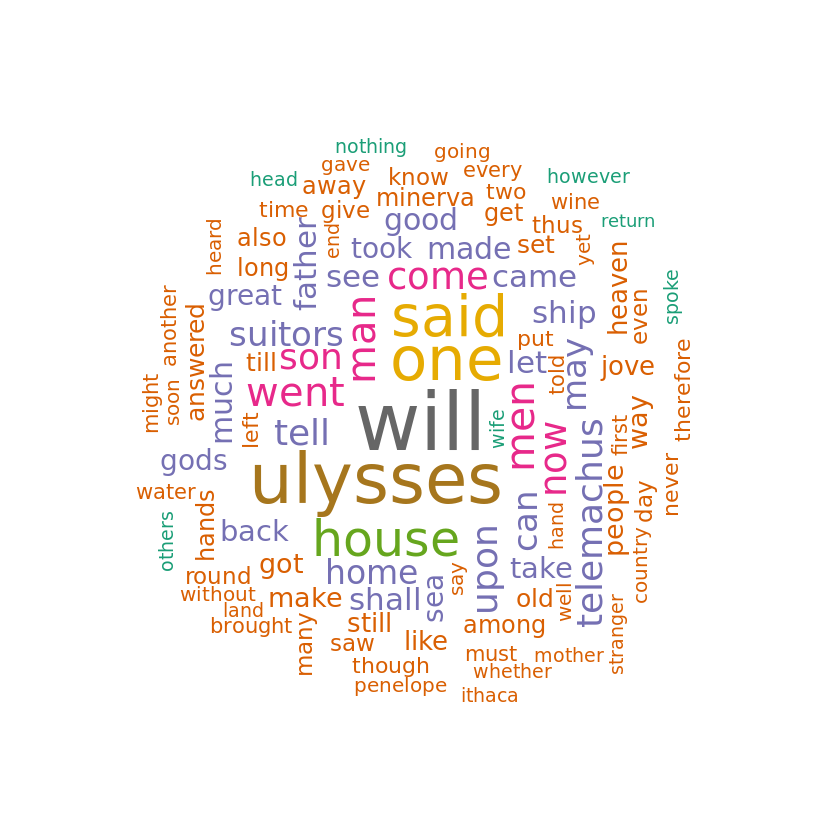

In [124]:
set.seed(8888)
wordcloud(words = ulysses_tdms_freqs_df$terms, freq = ulysses_tdms_freqs_df$freq, min.freq = 1,max.words=100, random.order=FALSE, random.color=FALSE, rot.per=0.4,colors=brewer.pal(8, "Dark2"))